In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Training Data.csv")

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
#cheak shaape
df.shape

(252000, 13)

In [5]:
#cheak info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
#cheak null value
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Data preprocessing 1

In [7]:
df.drop(columns=['Id','CITY'],inplace=True)

In [8]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [9]:
#cheak the number of unique value of all the object data type
df.select_dtypes(include='object').nunique()

Married/Single      2
House_Ownership     3
Car_Ownership       2
Profession         51
STATE              29
dtype: int64

# segment profession into smaller unique value

In [10]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [11]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer','Design_Engineer','Chemical_engineer','Biomedical_Engineer','Computer_hardware_engineer','Petroleum_Engineer','Civil_engineer','Industrial_Engineer','Technology_specialist']:
        return 'engineering'
    elif profession in ['Software_Developer','Technical_writer','Web_designer','Graphic_Designer']:
        return 'IT/software'
    elif profession in ['Civil_servant','Politician','Police_officer','Magistrate','Official','Army_officer']:
        return 'Government'
    elif profession in ['Librarian','Teacher']:
        return 'education'
    elif profession in ['Economist','Financial_Analyst']:
        return 'Fianance'
    elif profession in ['Air_traffic_controller','Flight_attendant']:
        return  'Aviation'
    elif profession in ['Architect','Designer','Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician','Dentist','Surgeon','']:
        return 'Medical'
    elif profession in ['Hotel_Manager','Chef']:
        return 'Hospitality'
    elif profession=='Artist':
        return 'Art'
    elif profession in ['Comedian','Psychologist']:
        return 'Entertainment'
    elif profession in ['Computer_operator','Secretary']:
        return 'Administration'
    elif profession in ['Chartered_Accountant','Analyst']:
        return 'Finance/accounting'
    elif profession in ['Geologist','Microbiologist','Technician','Statistician','Scientist']:
        return 'Science/Reaserch'
    else:
        return 'other'
    
  #apply  the segmentation function
df['profession']=df['Profession'].apply(segment_profession)

<Axes: >

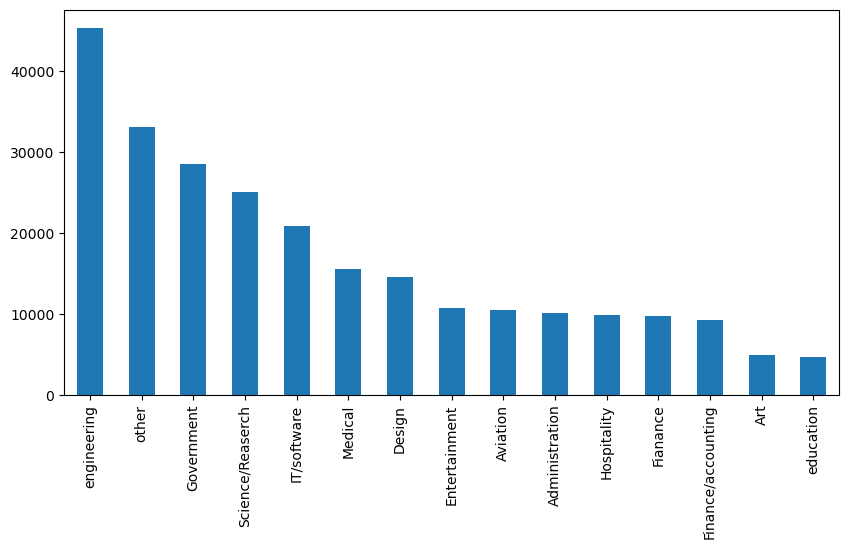

In [12]:
plt.figure(figsize=(10,5))
df['profession'].value_counts().plot(kind='bar')

In [13]:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [14]:
def segment_state(state):
    if state in ['Madhya_Pradesh','Maharashtra','Kerala','Odisha','Tamil_Nadu']:
        return 'south/central india'
    elif state in ['Gujarat','Rajasthan']:
        return 'west india'
    elif state in ['Telangana','Andhra_Pradesh']:
        return 'Telgu States'
    elif state in ['Bihar','West_Bengal','Haryana','Puducherry','Uttar_Pradesh']:
        return 'North india'
    elif state in ['Himachal_Pradesh','Punjab','Uttarakhand']:
        return 'Nortwest india'
    elif state in ['Tripura','Assam','Jammu_and_Kashmir','Jharkhand','Mizoram']:
        return  'Nortwest india'
    elif state in ['Delhi','Chhattisgarh','Chandigarh']:
        return 'Central india'
    elif state in ['Uttar_Pradesh[5]','Manipur','Sikkim']:
        return 'other'
    else:
        return 'Unknown'

In [15]:
df['STATE']=df['STATE'].apply(segment_state)

<Axes: >

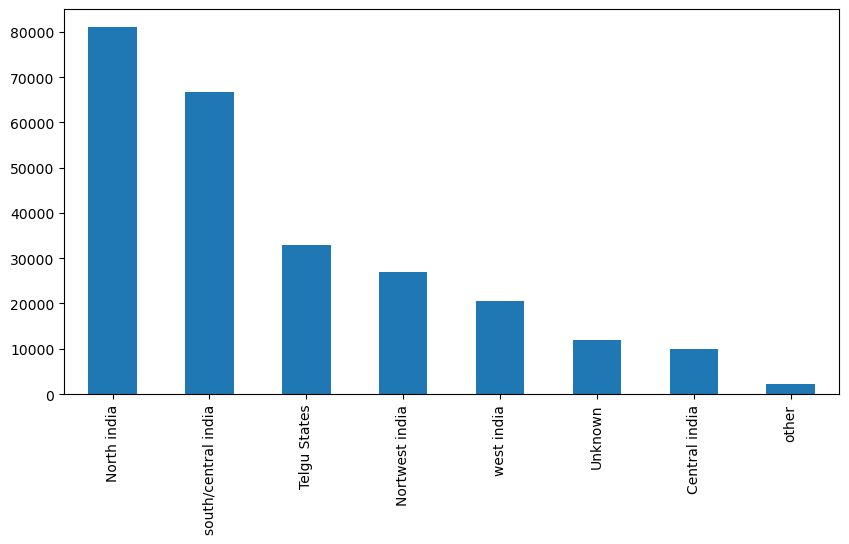

In [16]:
plt.figure(figsize=(10,5))
df['STATE'].value_counts().plot(kind='bar')

In [17]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,profession
0,1303834,23,3,single,rented,no,Mechanical_engineer,south/central india,3,13,0,engineering
1,7574516,40,10,single,rented,no,Software_Developer,south/central india,9,13,0,IT/software
2,3991815,66,4,married,rented,no,Technical_writer,south/central india,4,10,0,IT/software
3,6256451,41,2,single,rented,yes,Software_Developer,south/central india,2,12,1,IT/software
4,5768871,47,11,single,rented,no,Civil_servant,south/central india,3,14,1,Government


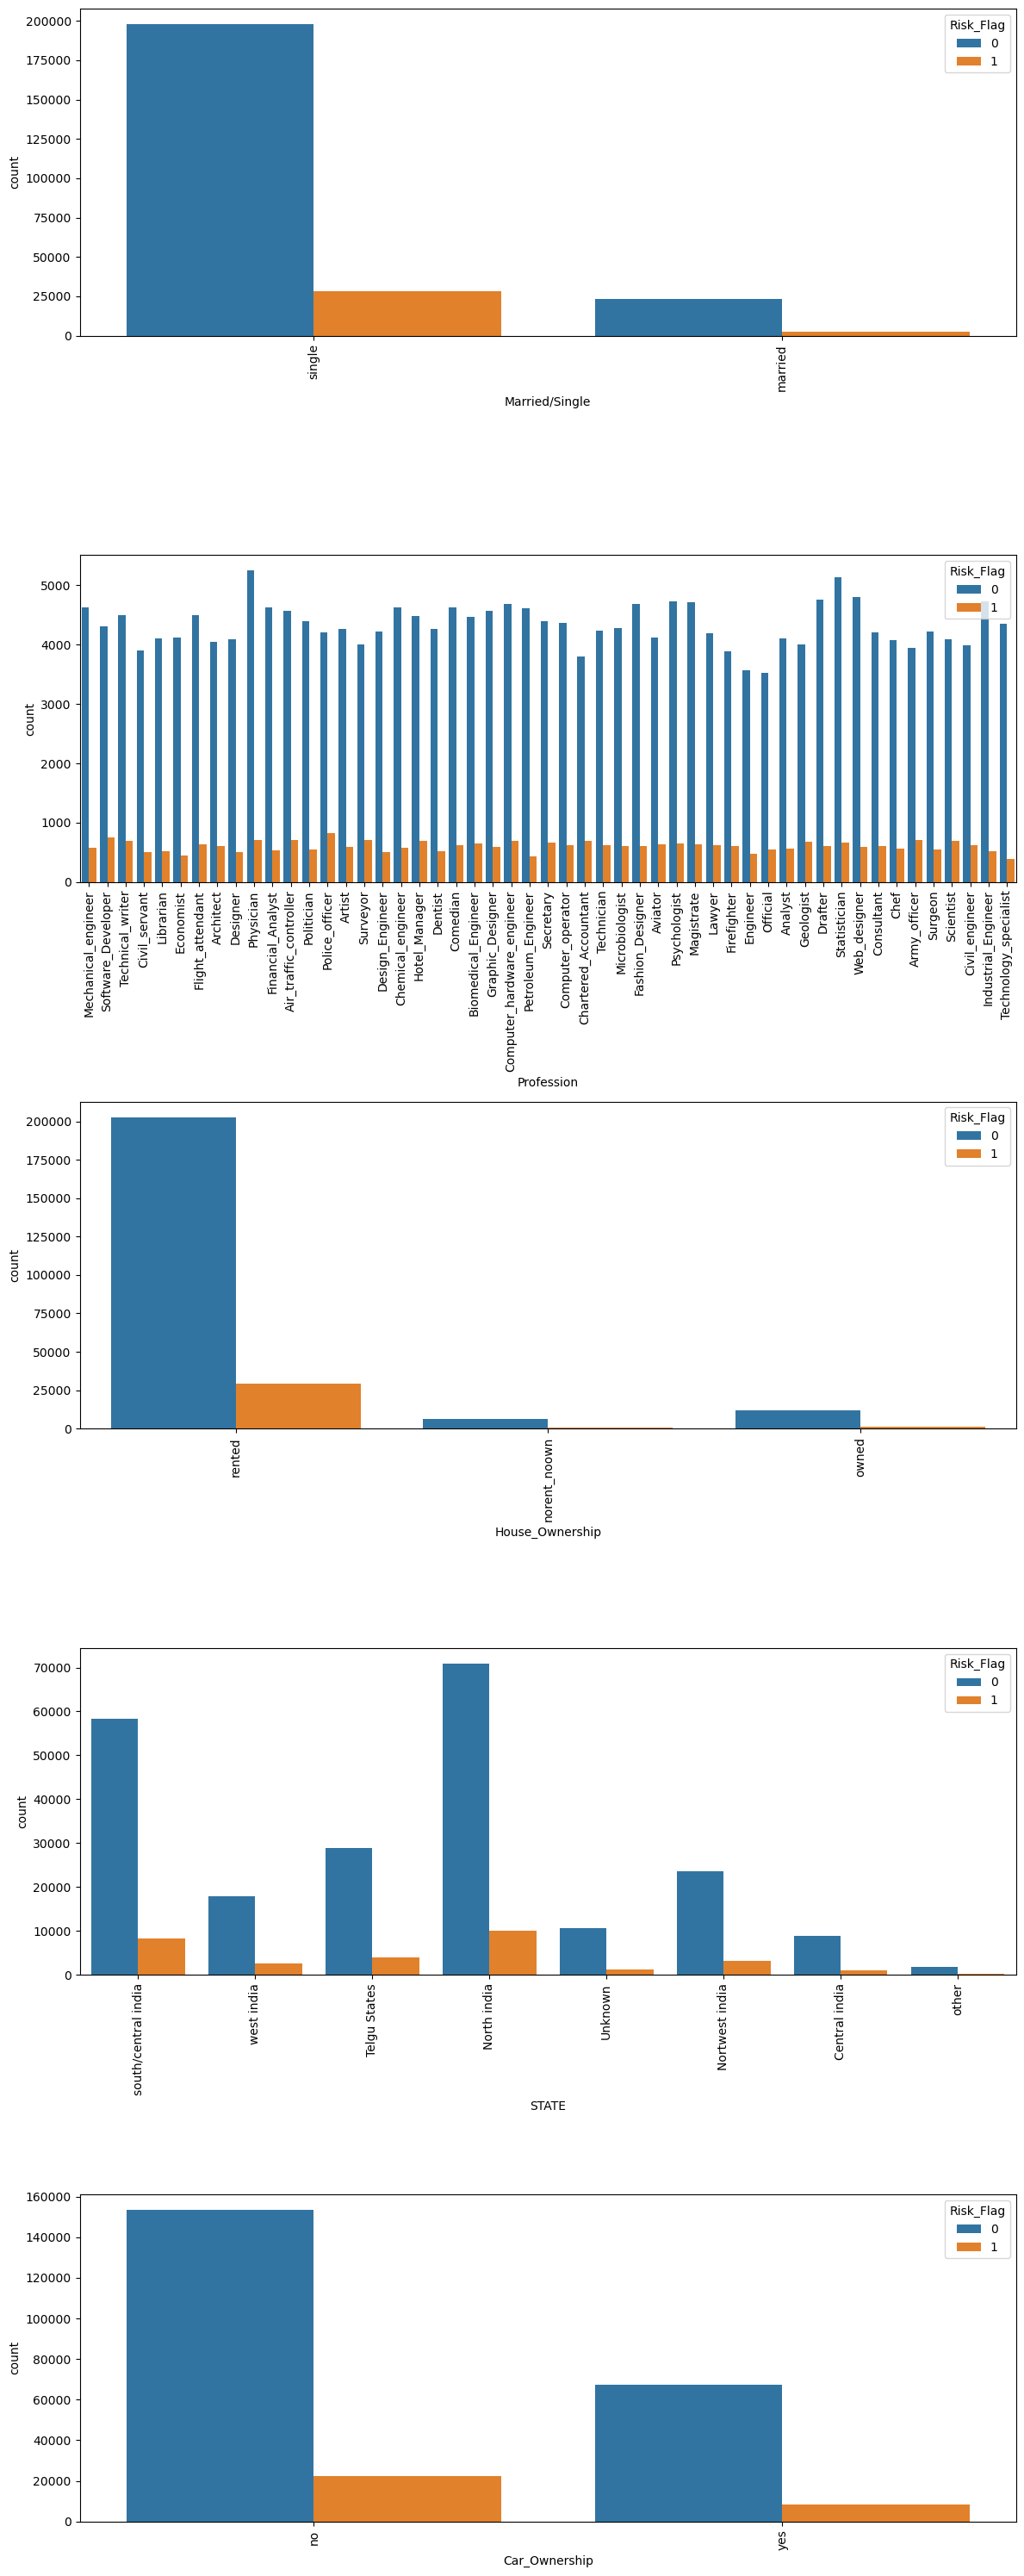

In [18]:
#list of categorical variable to plot
cat_vars=['Married/Single','Profession','House_Ownership','STATE','Car_Ownership']
#create figure subplot
fig, axs=plt.subplots(len(cat_vars),1,figsize=(12,len(cat_vars)*6))
axs=axs.flatten()
#create bar plot for each categorical variable
for i , var in enumerate(cat_vars):
    sns.countplot(x=var,hue='Risk_Flag',data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
#adjust spacing btween subplots
plt.tight_layout()
#remove the sixth subplot

plt.show()

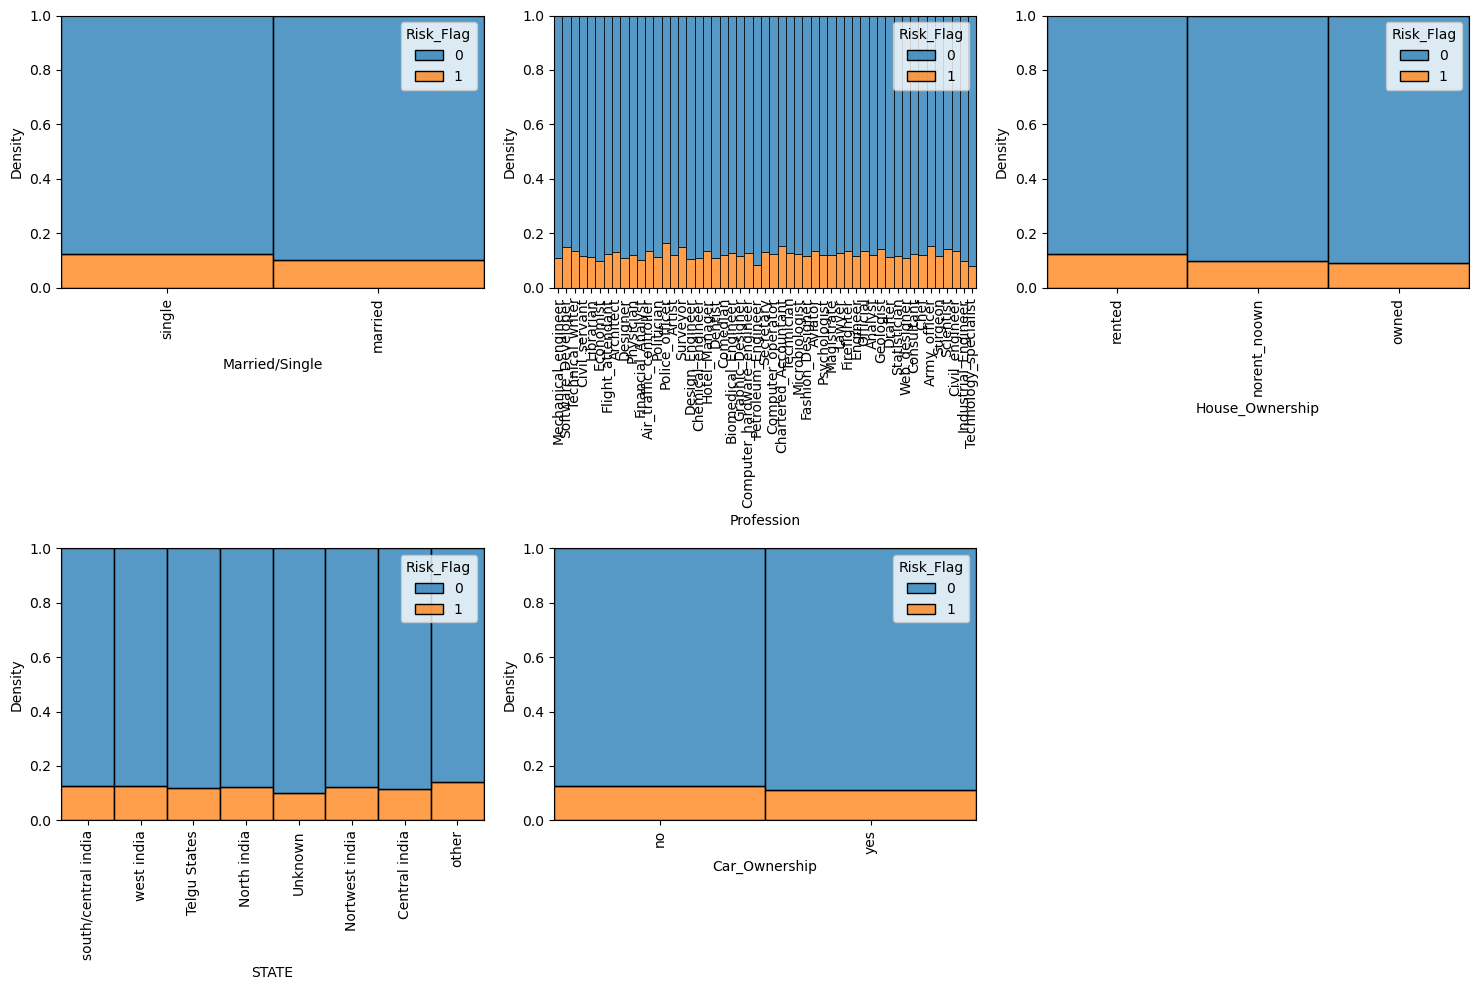

In [19]:
import warnings
warnings.filterwarnings("ignore")
#get list  of categorical variable
cat_vars=['Married/Single','Profession','House_Ownership','STATE','Car_Ownership']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()
#fig axs =plt.subplots(len(cat_vars),1,figsize=(12,len(cat_vars)*6))
#axs=axs.flatten()
#create hist plot for each categorical
for i , var in enumerate(cat_vars):
    sns.histplot(x=var,hue='Risk_Flag',data=df, ax=axs[i],multiple='fill',kde=False,element='bars',fill='True',stat='density')
    axs[i].set_xticklabels(df[var].unique(),rotation=90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()
fig.delaxes(axs[5])
plt.show()

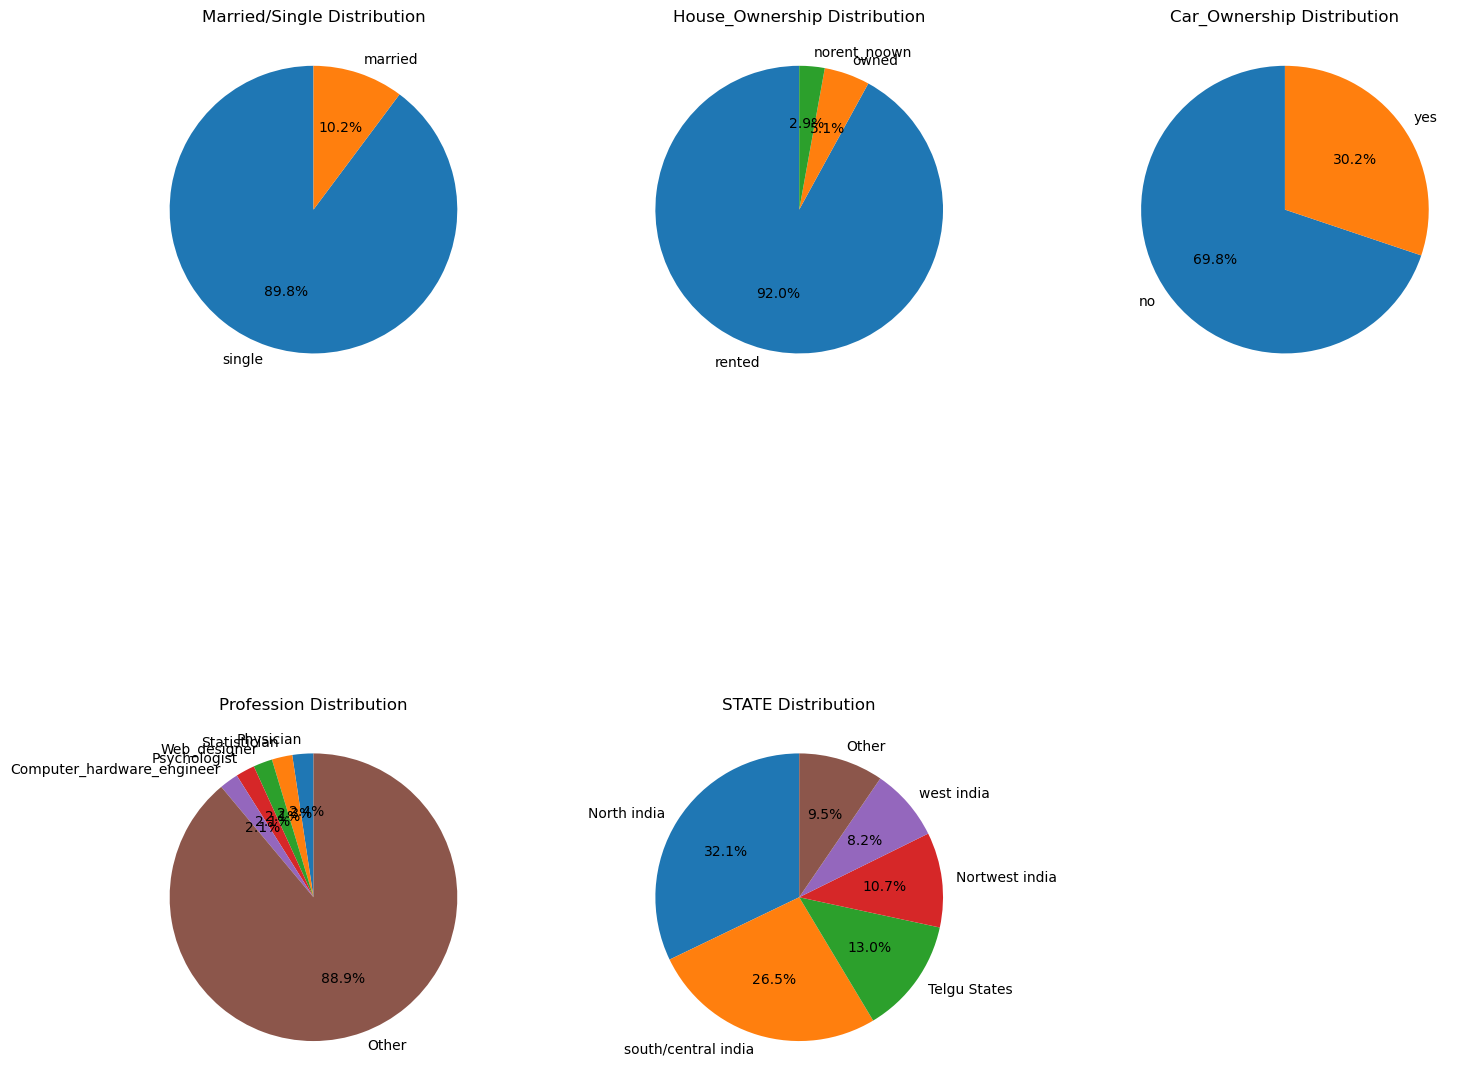

In [20]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Married/Single', 'House_Ownership', 'Car_Ownership',
            'Profession', 'STATE']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# remove sixth plot
fig.delaxes(axs[1][2])

# Show the plot
plt.show()

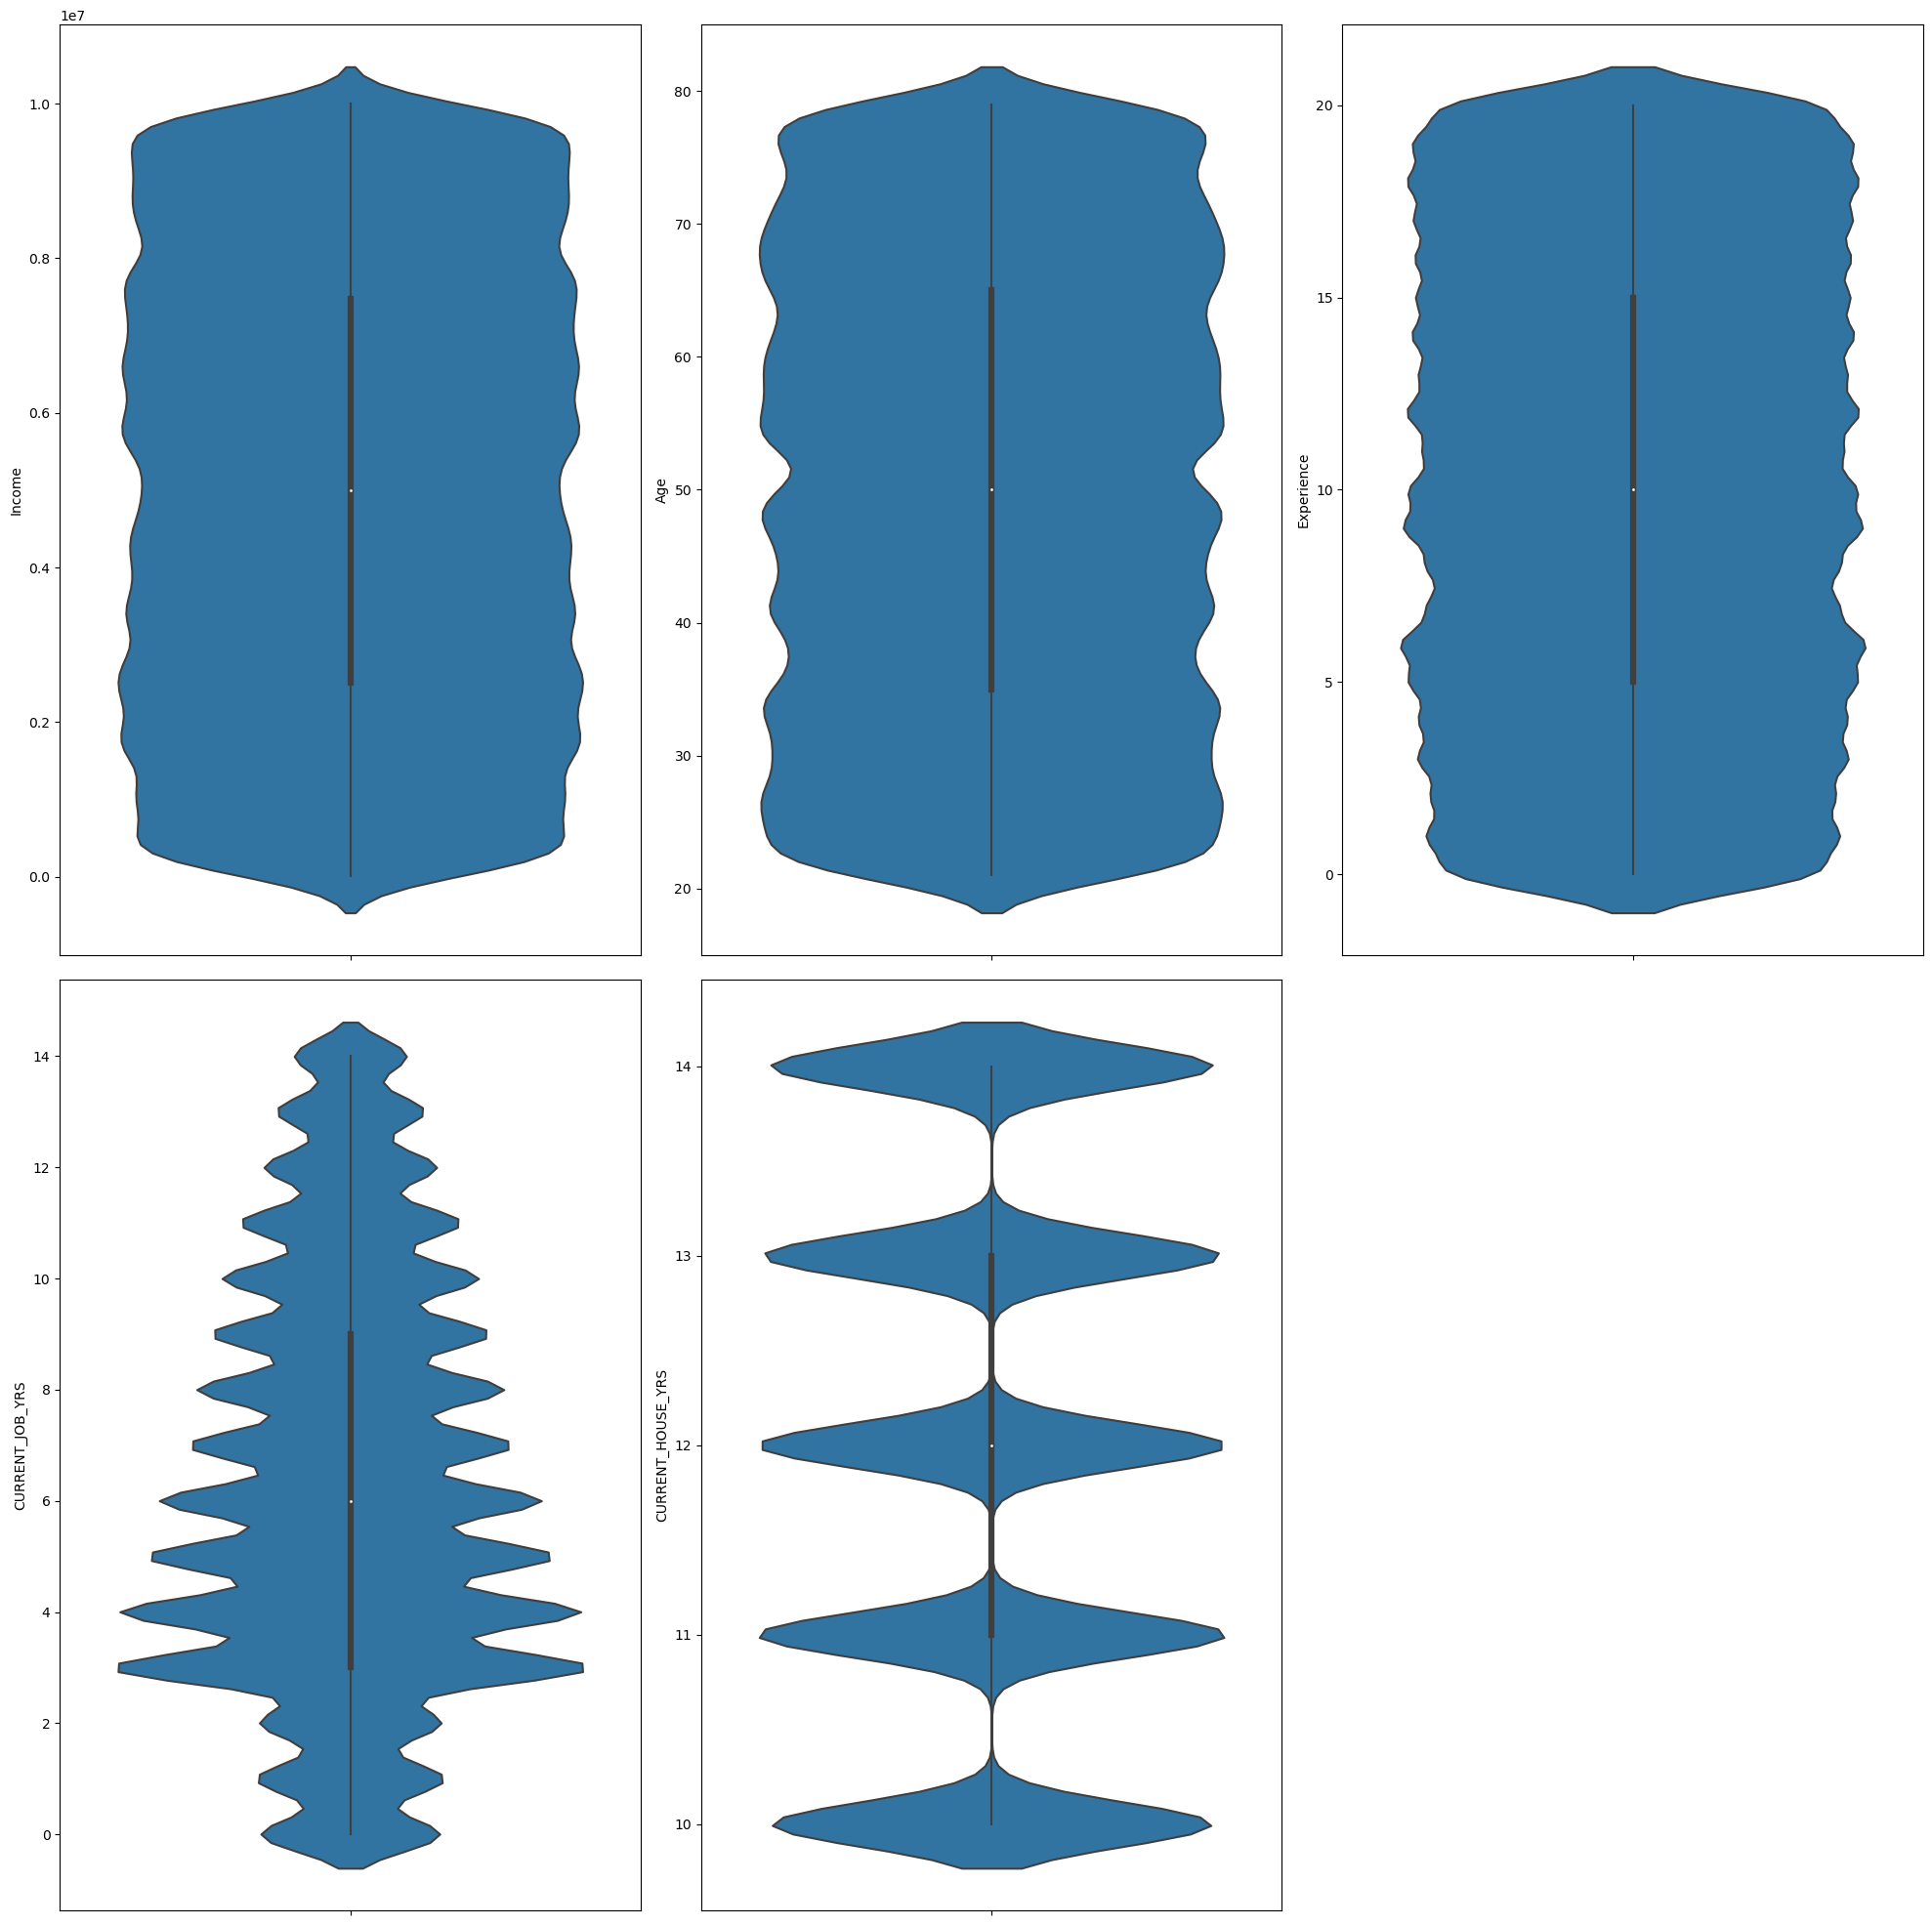

In [21]:
num_vars=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,20))
axs=axs.flatten()
for i, var in enumerate(num_vars):
    sns.violinplot(y=var,hue='Risk_Flag',data=df,ax=axs[i])
fig.tight_layout()
fig.delaxes(axs[5])
plt.show()

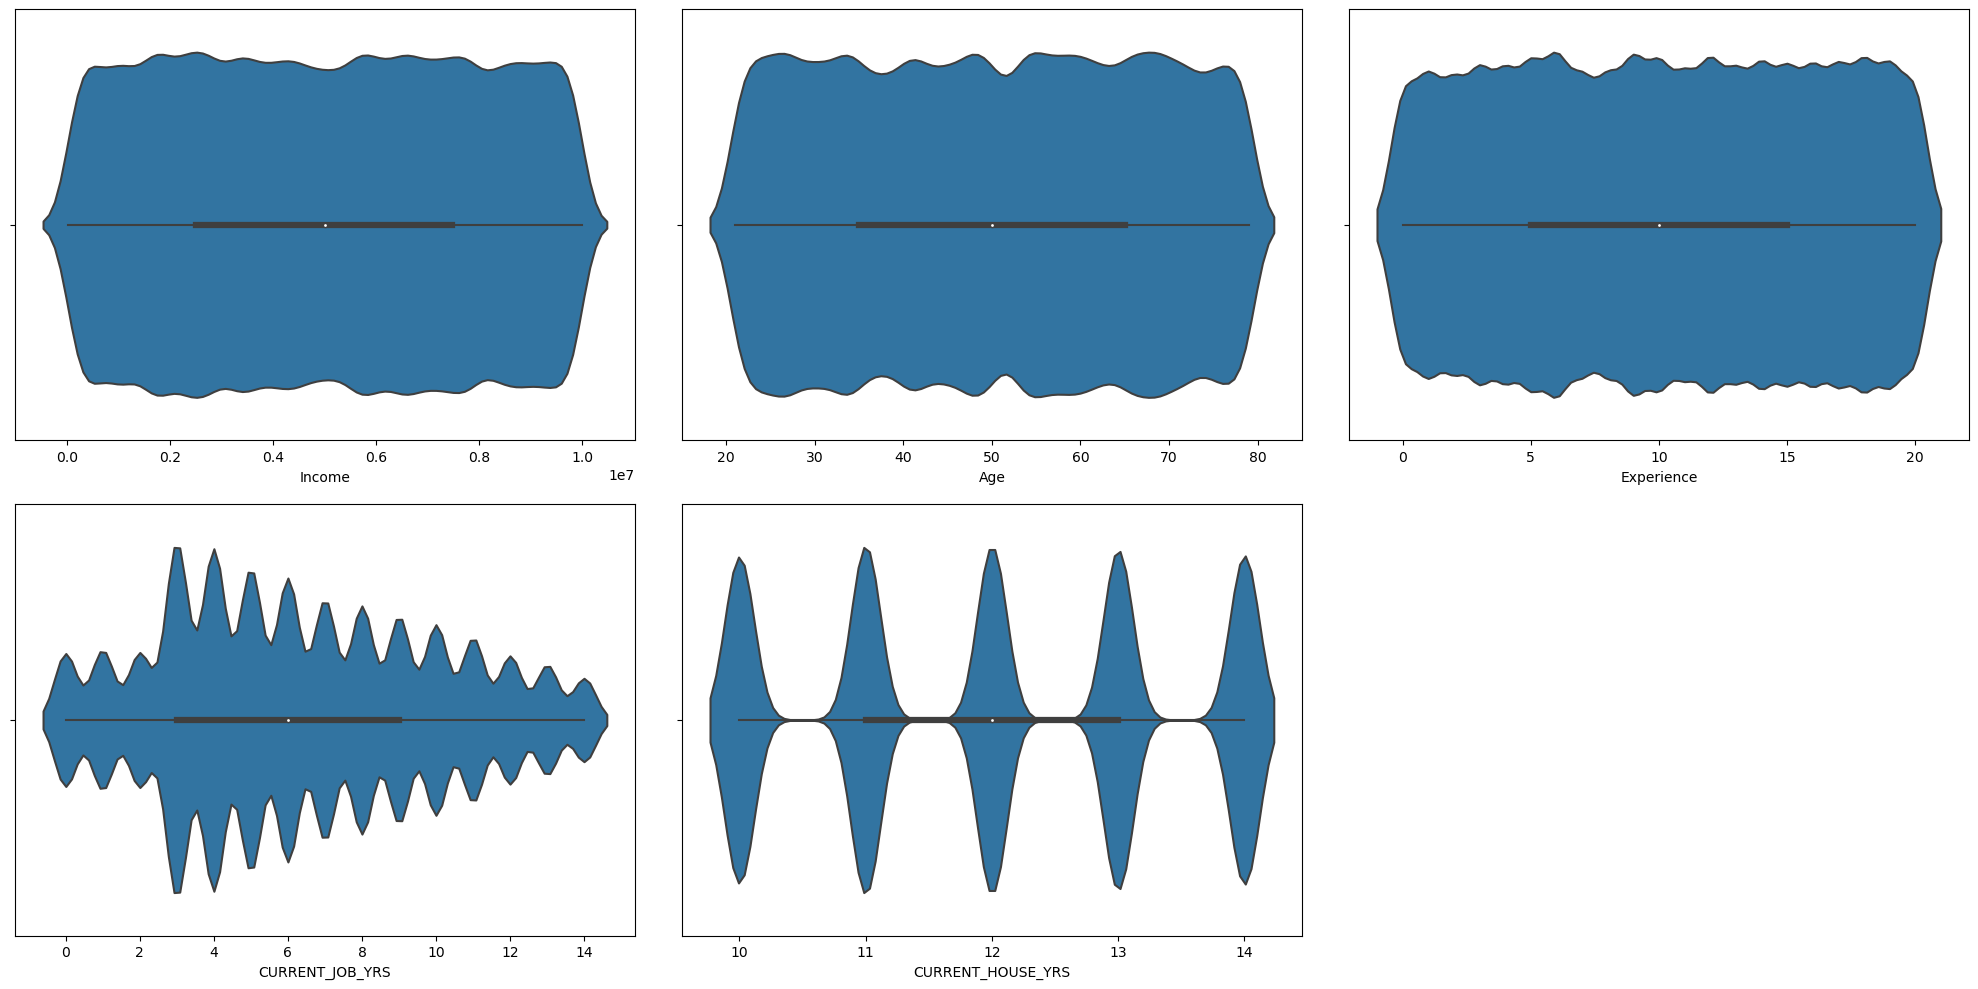

In [22]:
num_vars=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i , var in enumerate(num_vars):
    sns.violinplot(x=var,data=df,ax=axs[i])
    fig.tight_layout()
fig.delaxes(axs[5])
plt.show()

# Label Encoding for each Object datatype

In [23]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:  {df[col].unique()}")

Married/Single:  ['single' 'married']
House_Ownership:  ['rented' 'norent_noown' 'owned']
Car_Ownership:  ['no' 'yes']
Profession:  ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
STATE:  ['south/central india' 'west india' 'Telgu States' 'North ind

In [24]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}:  {df[col].unique()}")

Married/Single:  [1 0]
House_Ownership:  [2 0 1]
Car_Ownership:  [0 1]
Profession:  [33 43 47 11 31 20 25  2 18 37 23  0 39 38  4 46 17  9 28 16 12  6 27 13
 36 42 14  7 48 34 22  5 40 32 30 24 21 35  1 26 19 44 50 15  8  3 45 41
 10 29 49]
STATE:  [6 7 3 1 4 2 0 5]
profession:  [13  9  7 12  5  2  3 10  1 14  8  4  0  6 11]


In [25]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,profession
0,1303834,23,3,1,2,0,33,6,3,13,0,13
1,7574516,40,10,1,2,0,43,6,9,13,0,9
2,3991815,66,4,0,2,0,47,6,4,10,0,9
3,6256451,41,2,1,2,1,43,6,2,12,1,9
4,5768871,47,11,1,2,0,11,6,3,14,1,7


<Axes: >

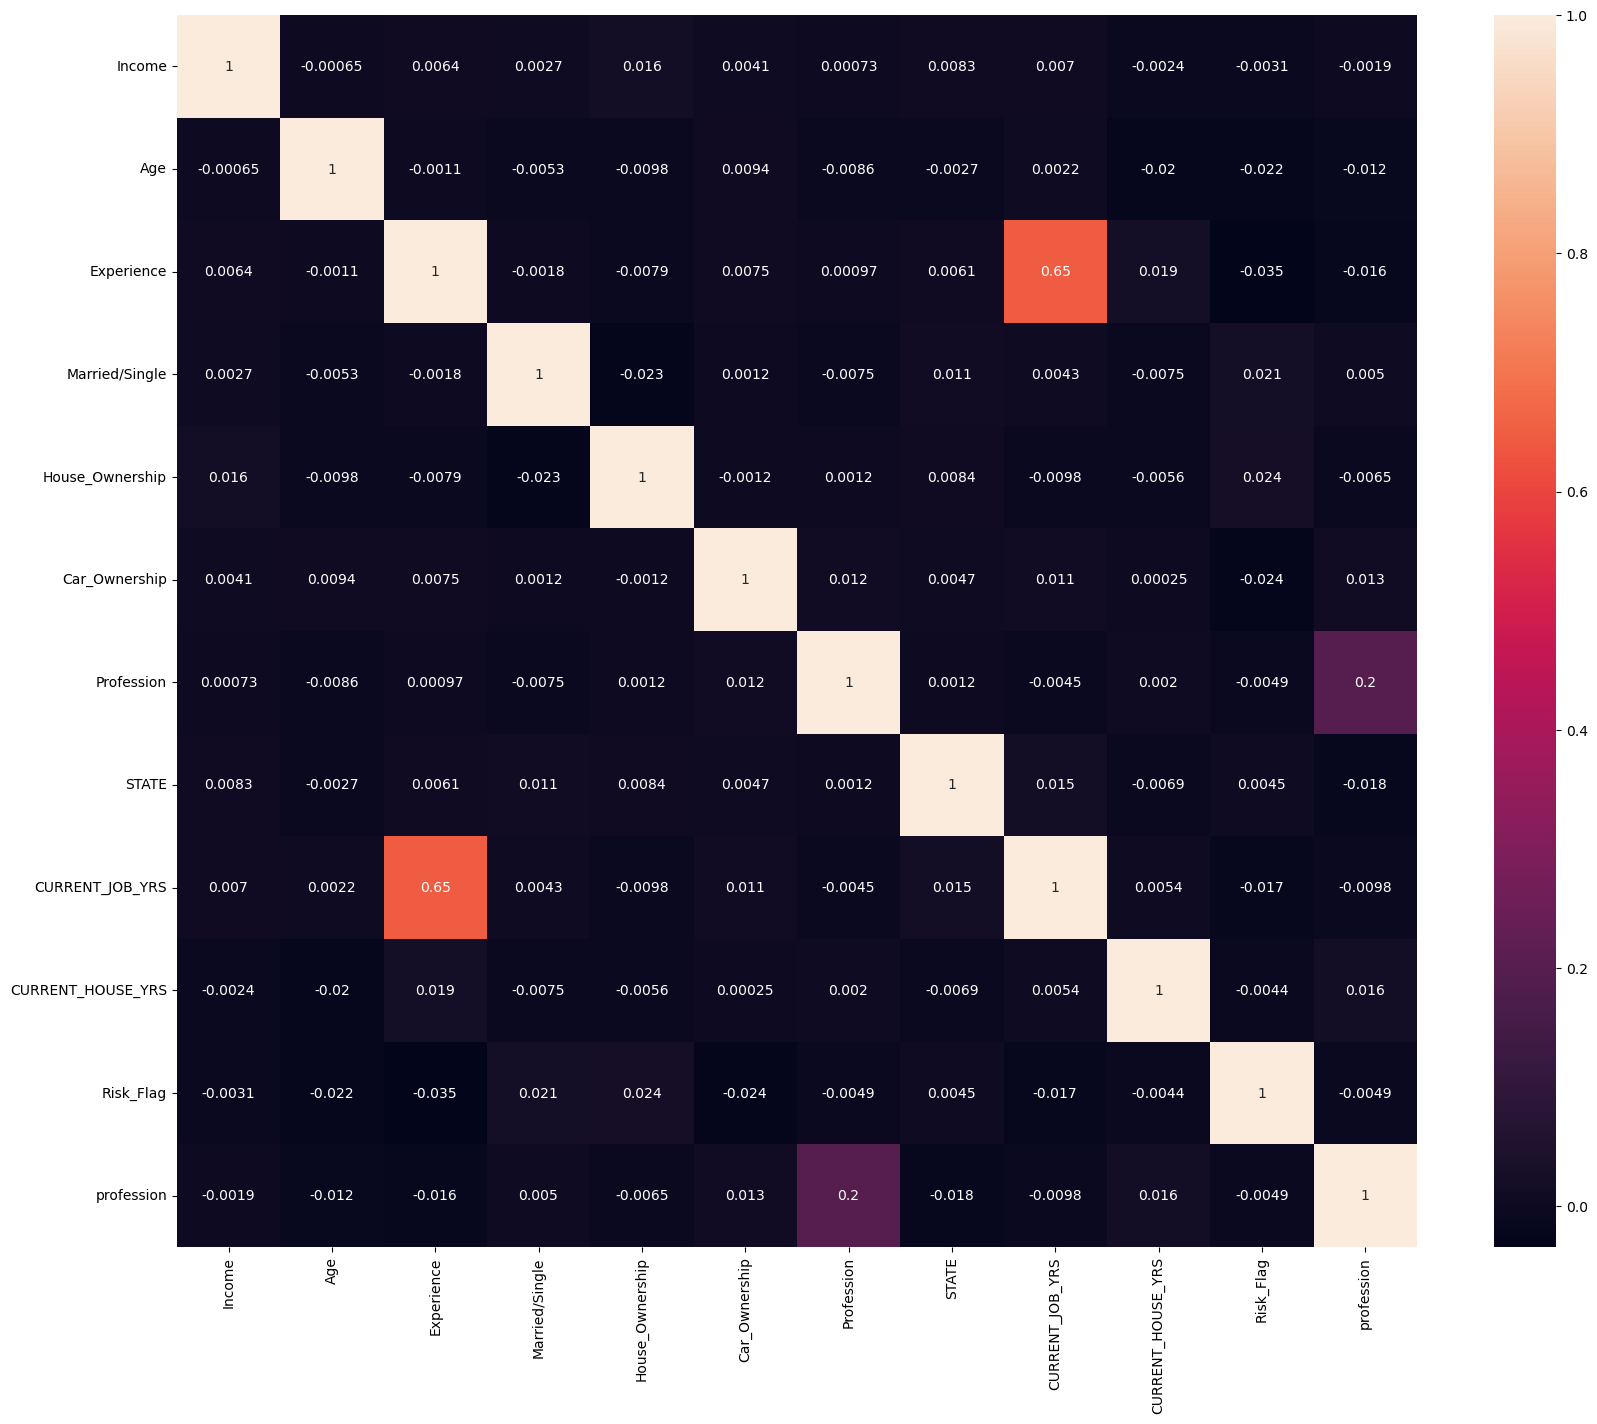

In [26]:
#corrrelation
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(),annot=True)

In [27]:
#train  test model
from sklearn.model_selection import train_test_split
X=df.drop(['Risk_Flag'],axis=1)
y=df['Risk_Flag']
# Split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

# Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0,max_depth=4,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [29]:
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(X_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy score: 69.14 %


In [30]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 score:',(f1_score(y_test,y_pred,average='micro')))
print('Recall score:',(recall_score(y_test,y_pred,average='micro')))
print('precision score:',precision_score(y_test,y_pred,average='micro'))

F-1 score: 0.6913888888888889
Recall score: 0.6913888888888889
precision score: 0.6913888888888889


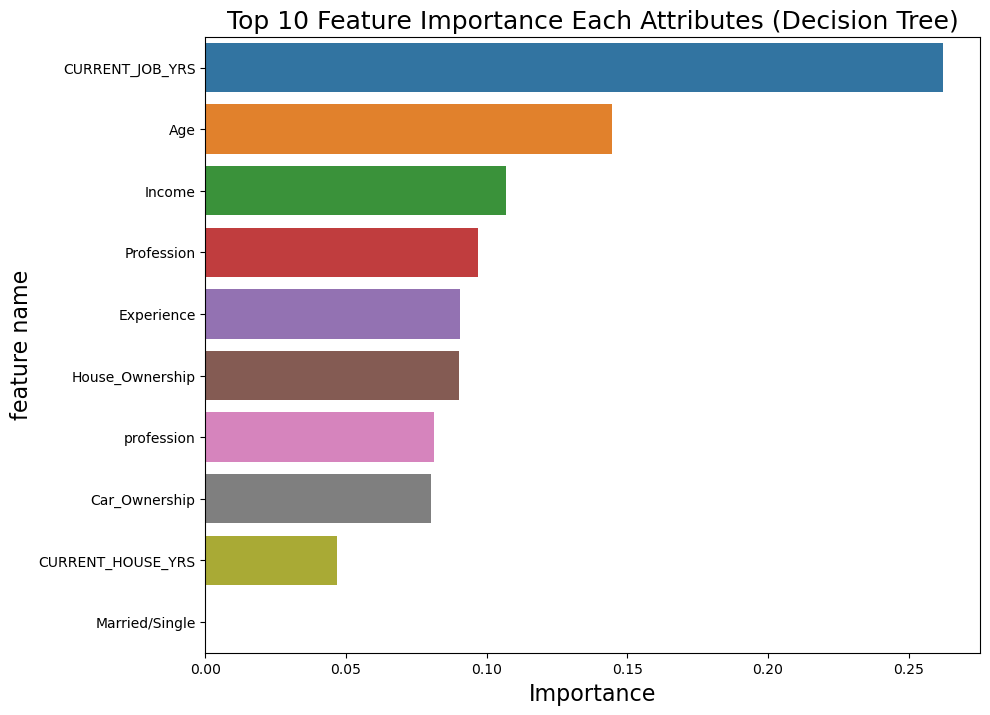

In [31]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)   

fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('feature name',fontsize=16)
plt.show()

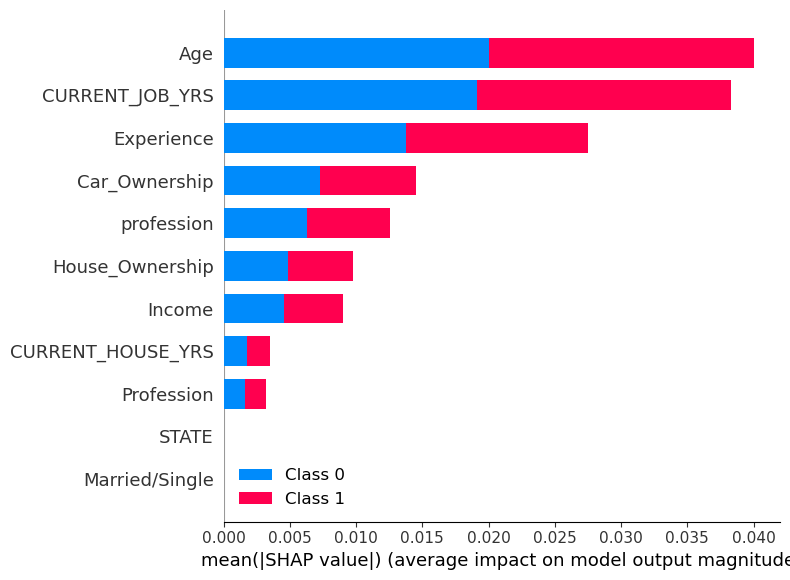

In [32]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [33]:
!pip install shap

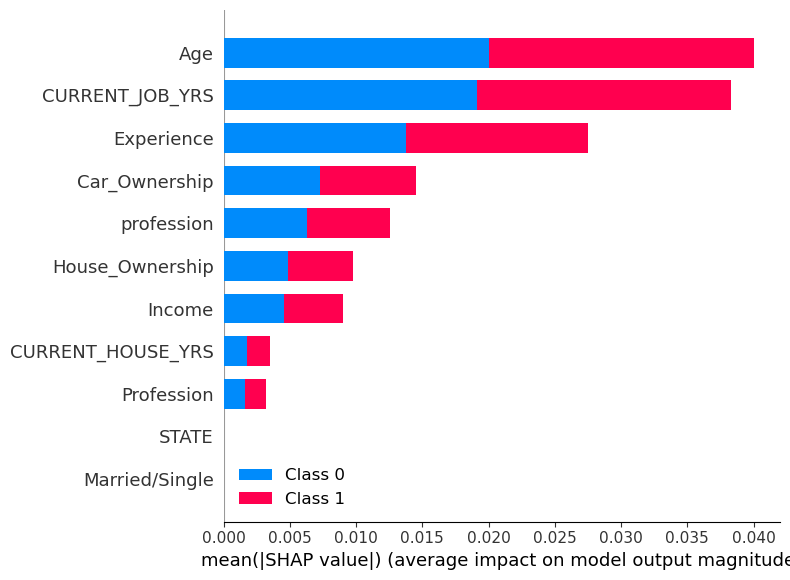

In [34]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

Text(0.5, 1.0, 'Accuracy Score for decision Tree: 0.6913888888888889')

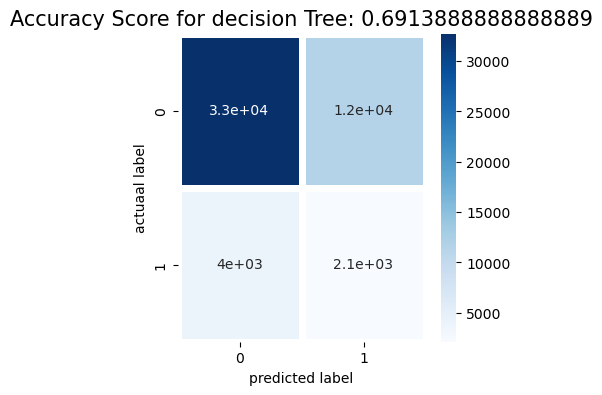

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(data=cm,linewidth=5,annot=True,cmap='Blues')
plt.ylabel('actuaal label')
plt.xlabel('predicted label')
all_sample_title='Accuracy Score for decision Tree: {0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [40]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 score:',(f1_score(y_test,y_pred,average='micro')))
print('Recall score:',(recall_score(y_test,y_pred,average='micro')))
print('precision score:',precision_score(y_test,y_pred,average='micro'))

F-1 score: 0.6913888888888889
Recall score: 0.6913888888888889
precision score: 0.6913888888888889


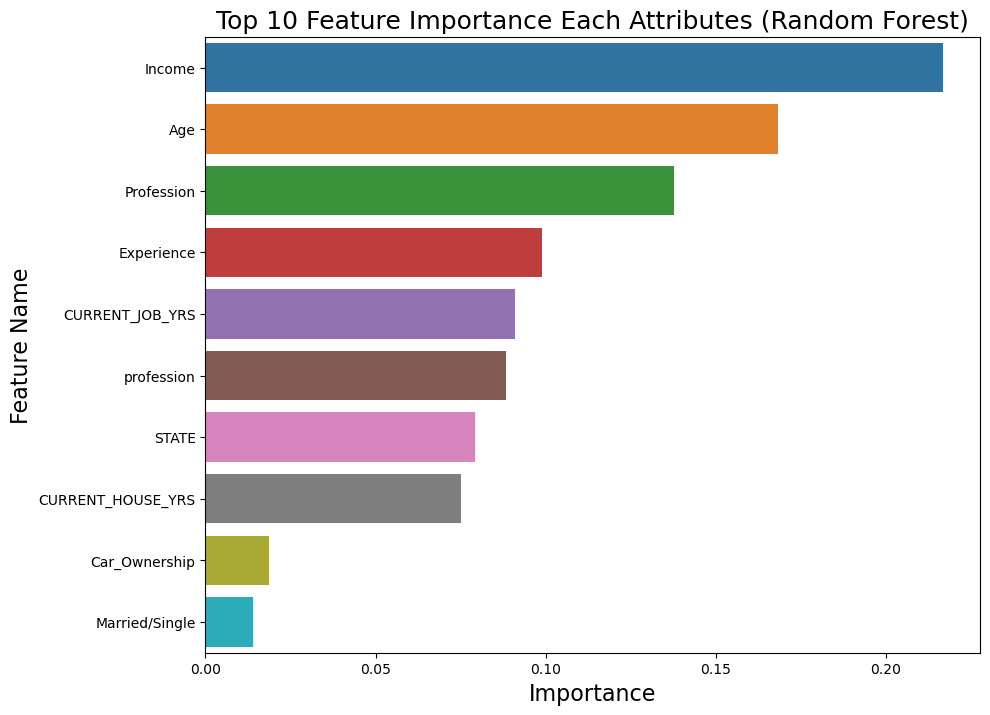

In [41]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [44]:
import pickle
pickle.dump(DecisionTreeClassifier,open('loan.pkl','wb'))